In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.drop('quality',axis = 1, inplace = True)

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [6]:
# from sklearn.preprocessing import MinMaxScaler
# st_scaler = MinMaxScaler()
# scaled_df = st_scaler.fit_transform(df)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

In [8]:
df_pca

array([[-13.22490501,  -2.02389981,  -1.12682053],
       [ 22.03772361,   4.40832155,  -0.31037799],
       [  7.16267333,  -2.50146086,  -0.5818683 ],
       ...,
       [ -3.43135351,  14.27124349,  -1.75071927],
       [  1.13287834,  16.31616732,  -2.13441396],
       [ -3.8743766 ,   3.12634754,  -1.87414925]], shape=(1599, 3))

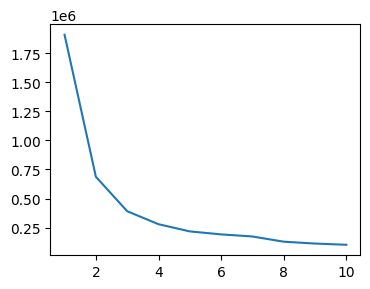

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=28)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(4,3))
plt.plot(range(1,11),wcss)
plt.show()

In [11]:
from sklearn.cluster import KMeans,DBSCAN
kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(df_pca)

In [12]:
pred[:10]

array([2, 0, 0, 0, 2, 0, 0, 2, 2, 1], dtype=int32)

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(df_pca,pred)*100

52.44894271867358

In [ ]:
label = kmeans.labels_

In [15]:
# array = np.array([[7.4,	0.700,	0.00,	1.9,	0.076,	11.0,	34.0,	0.99780,	3.51,	0.56,	9.4]])
# new_pred = kmeans.predict(array)
# new_pred

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df,pred)

0.40245210148242533

# DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.3, min_samples=5)

In [ ]:
model = dbscan.fit(df)
model

,eps,0.3
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [ ]:
label = model.labels_
label

array([-1, -1, -1, ..., -1, -1, -1], shape=(1599,))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_clstr = AgglomerativeClustering()
predd = agg_clstr.fit_predict(df_pca)
predd 

array([0, 0, 0, ..., 0, 0, 0], shape=(1599,))

In [17]:
silhouette_score(df,predd)

0.614507859714535